# Задание

1.Используйте метод K-средних и метод DBSCAN на самостоятельно сгенерированной выборке с количеством кластеров не менее 4. Для увеличения числа кластеров при генерации можно задать количество центров в функции make_blobs через параметр centers.

2.Используйте эти же два метода на датасете Mall_Customers.

3.Для каждого метода необходимо построить график.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN

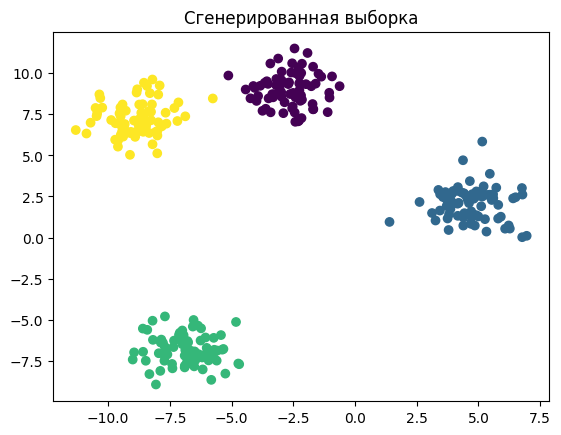

In [ ]:
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Сгенерированная выборка")
plt.show()

In [ ]:
# Метод K-средних
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

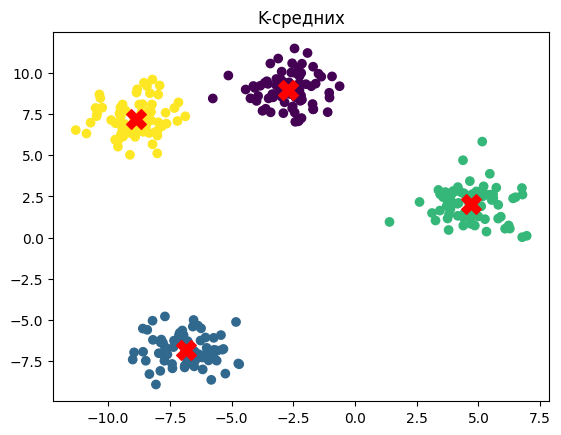

In [ ]:
# Визуализация результатов K-средних
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red')
plt.title("K-средних")
plt.show()

In [ ]:
# Метод DBSCAN
clustering = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = clustering.fit_predict(X)

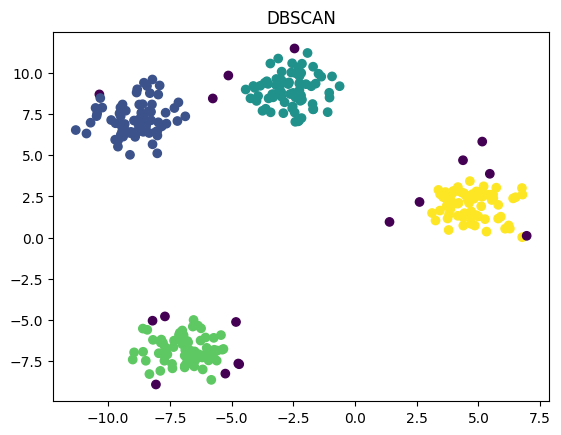

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

file_path = 'Mall_Customers.csv'
mall_customers = pd.read_csv(file_path)

In [ ]:
mall_customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
mall_customers['Gender'].unique()

array(['Male', 'Female'], dtype=object)

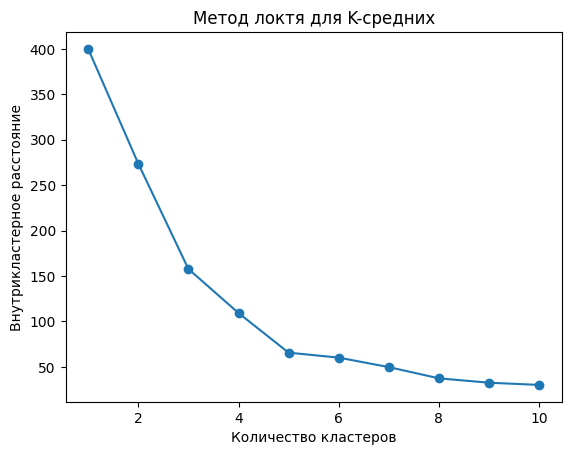

In [ ]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = mall_customers[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод локтя для K-средних')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутрикластерное расстояние')
plt.show()

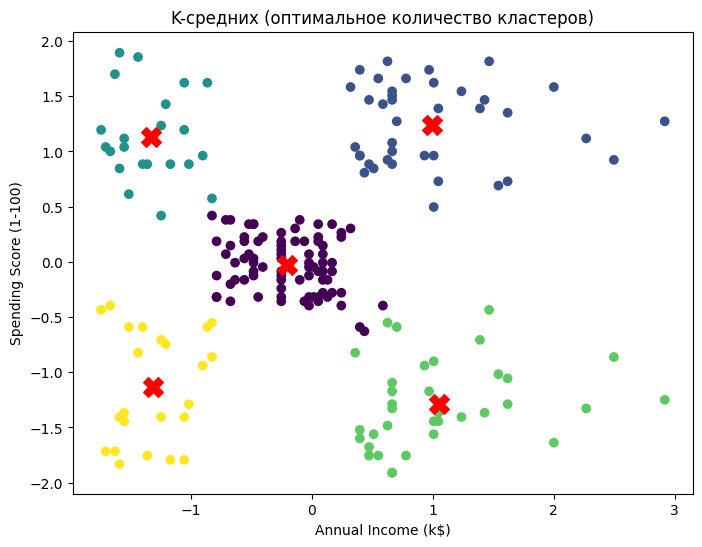

In [ ]:
# Выбор оптимального числа кластеров для K-средних
optimal_clusters_kmeans = 5

# Метод K-средних с оптимальным числом кластеров
kmeans_optimal = KMeans(n_clusters=optimal_clusters_kmeans, random_state=42)
kmeans_labels_optimal = kmeans_optimal.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels_optimal, cmap='viridis')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], marker='X', s=200, color='red')
plt.title("K-средних (оптимальное количество кластеров)")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

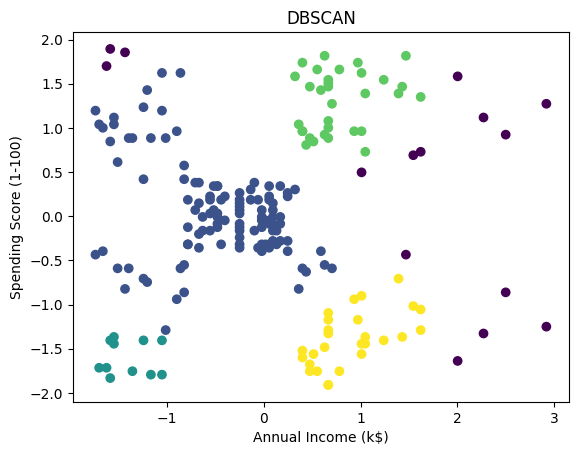

In [ ]:
dbscan = DBSCAN(eps=0.4, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Визуализация результатов DBSCAN
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', marker='o')
plt.title("DBSCAN")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

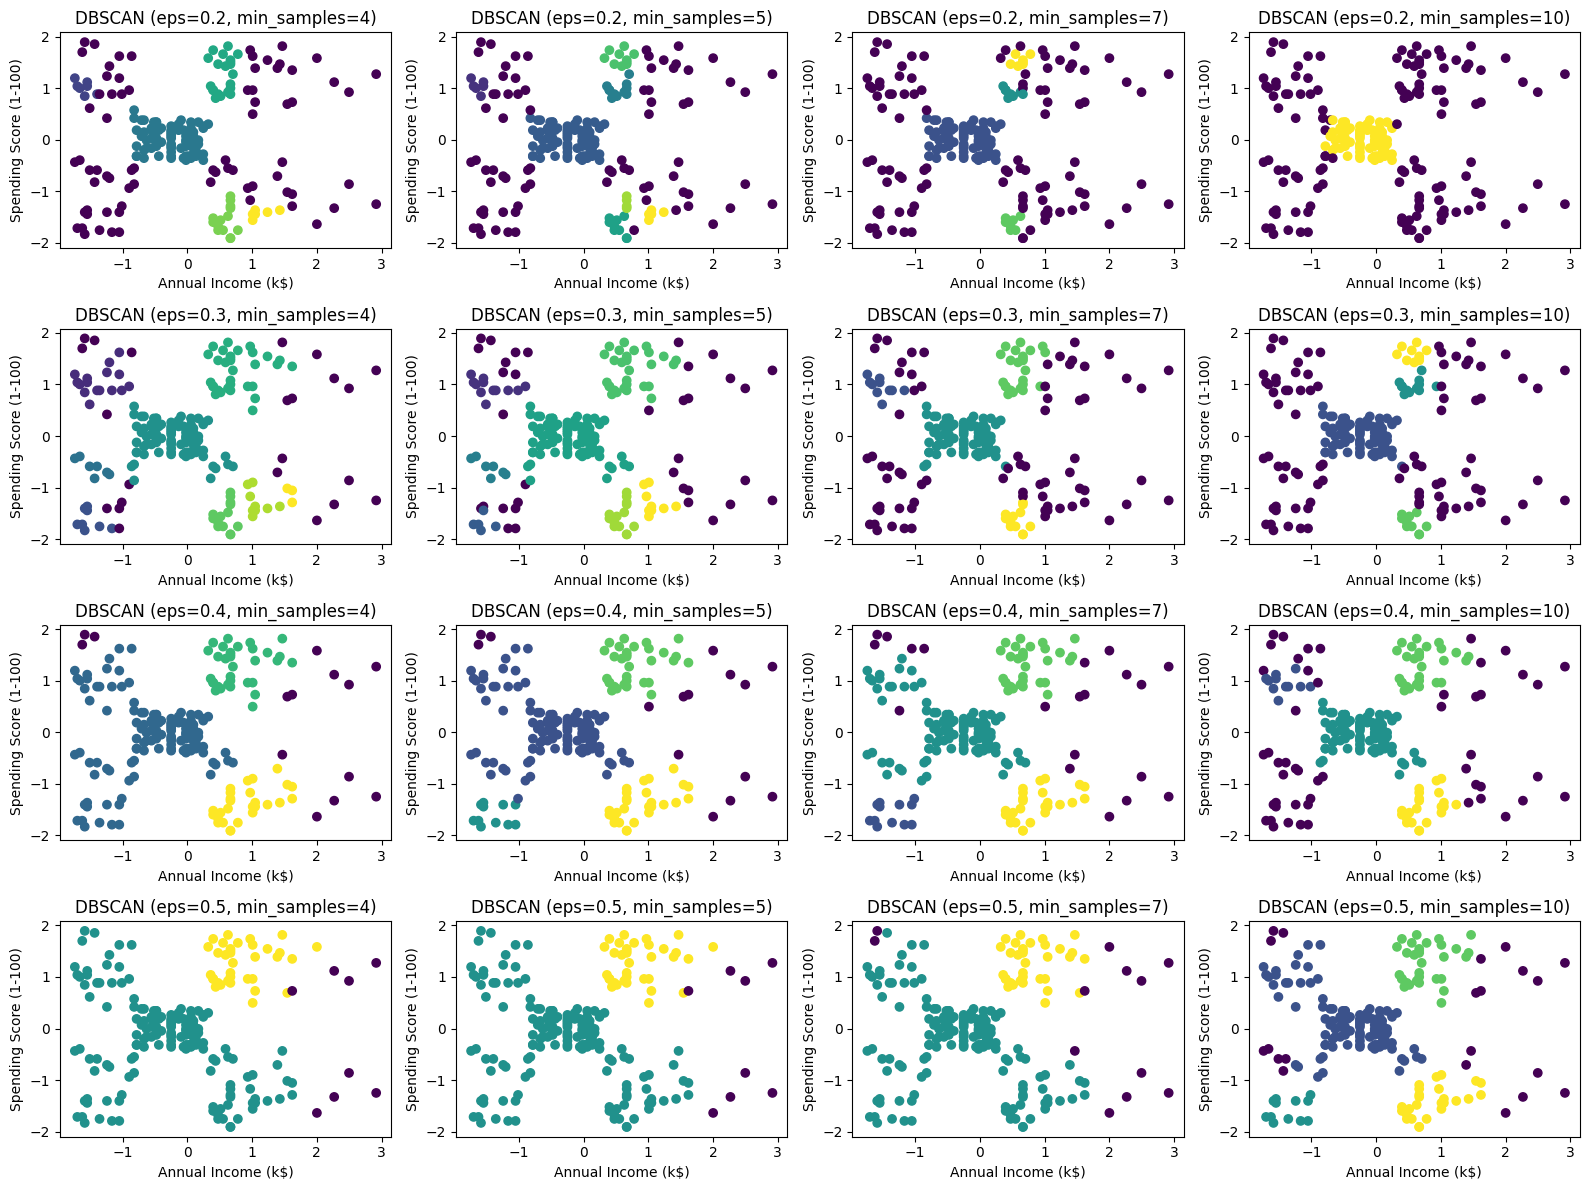

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Параметры для экспериментов с DBSCAN
eps_values = [0.2, 0.3, 0.4, 0.5]
min_samples_values = [4, 5, 7, 10]
ev_len = len(eps_values)
ms_len = len(min_samples_values)

# Размер холста для графиков
plt.figure(figsize=(16, 12))

# Перебор значений eps и min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Создание модели DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)

        # Построение подграфика
        plt.subplot(ev_len, ms_len, i * ms_len + j + 1)
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', marker='o')
        plt.title(f"DBSCAN (eps={eps}, min_samples={min_samples})")
        plt.xlabel('Annual Income (k$)')
        plt.ylabel('Spending Score (1-100)')
        plt.tight_layout()

# Отображение всех графиков
plt.show()